## Plot 0D Reactor Data

In [1]:
import pandas as pd
import numpy as np
import os

import matplotlib.pyplot as plt
WORKSPACE_PATH  = os.environ['WORKSPACE_PATH']
plt.style.use(WORKSPACE_PATH+'/ROMNet/romnet/extra/postprocessing/presentation.mplstyle')

from numpy import diff

import cantera as ct

In [2]:
OutputDir  = WORKSPACE_PATH+'/ROMNet/Data/0DReact_Isobaric_10Cases/'

CasesVec   = [1]#[0,2,4,6,8]
DirDir     = OutputDir 

NVarsRed   = 5

InputVars  = []
for i in range(NVarsRed):
    InputVars.append('PC_'+str(i+1))
InputVars

['PC_1', 'PC_2', 'PC_3', 'PC_4', 'PC_5']

In [3]:
ICsVec = pd.read_csv(OutputDir+'/Orig/train/ext/ICs.csv').to_numpy()
P0sVec       = ICsVec[:,0]
EqRatio0sVec = ICsVec[:,1]
T0sVec       = ICsVec[:,2]

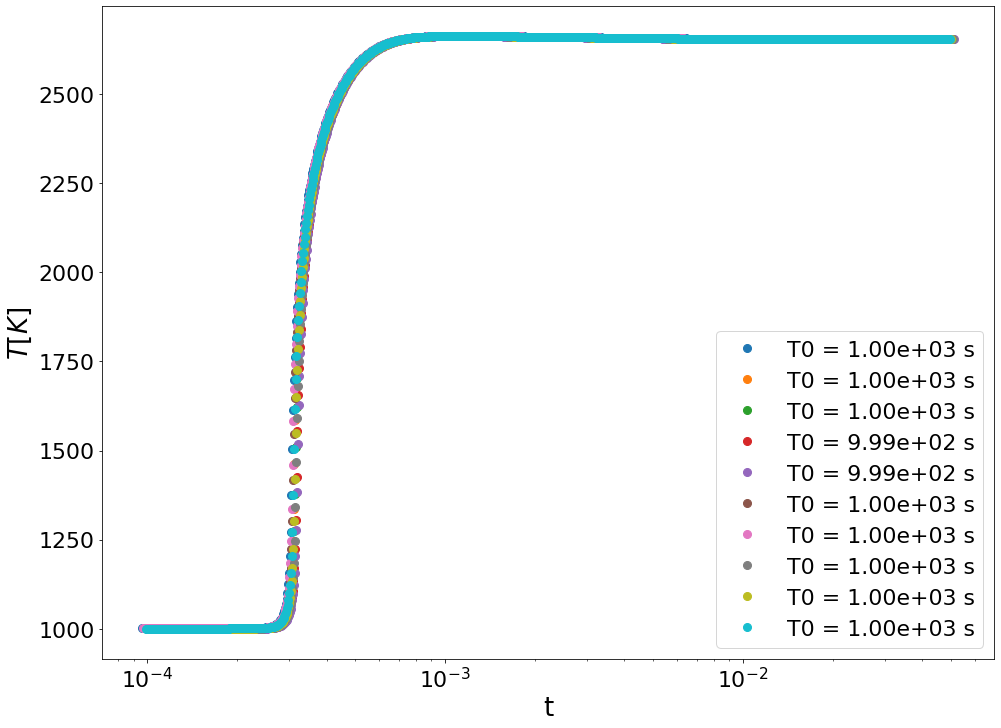

In [4]:
fig  = plt.figure(figsize=(16,12))
for i in range(len(T0sVec)):
    Data1 = pd.read_csv(OutputDir+'/Orig/train/ext/y.csv.'+str(i+1))
    
    plt.plot(Data1['t'], Data1['T'], 'o', label='T0 = '+"{:.2e}".format(T0sVec[i])+' s')
    
    plt.xlabel('t')
    plt.ylabel(r'$T [K]$')
    plt.legend()
    plt.xscale('log')

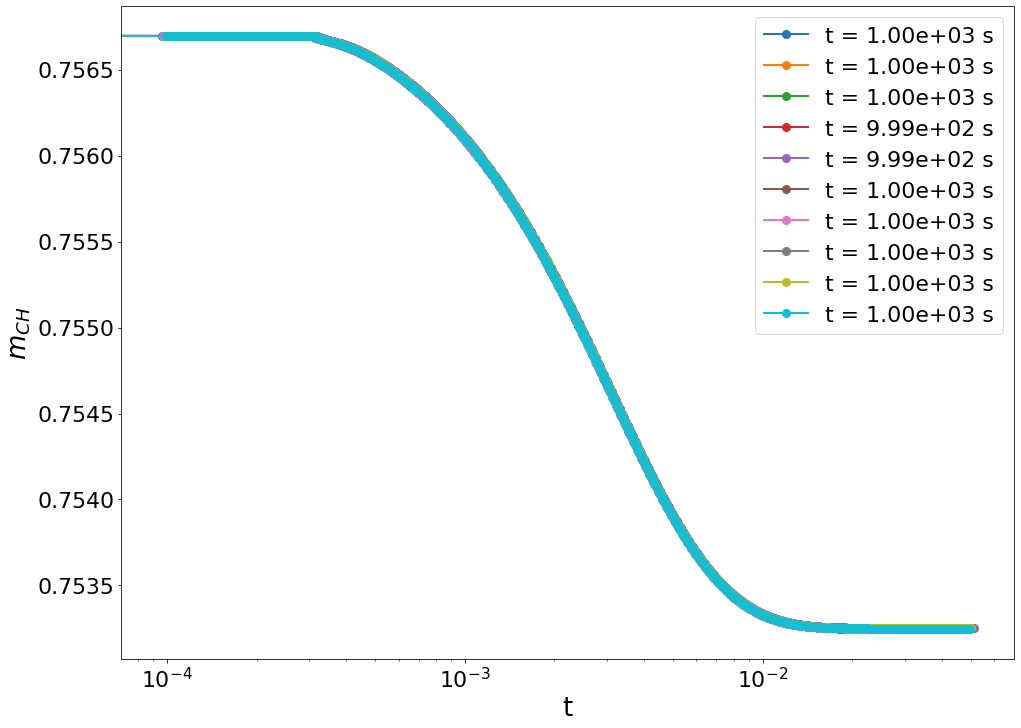

In [13]:
fig  = plt.figure(figsize=(16,12))
for i in range(len(T0sVec)):
    Data1 = pd.read_csv(OutputDir+'/Orig/train/ext/y.csv.'+str(i+1))
    
    plt.plot(Data1.t, Data1.N2, '-o', label='t = '+"{:.2e}".format(T0sVec[i])+' s')
    
    plt.xlabel('t')
    plt.ylabel(r'$m_{CH}$')
    plt.legend()
    plt.xscale('log')

y0_pca =  [-5.26018829e+01  2.71611631e-02 -8.50597386e-03  2.38046626e-03
 -7.37511512e-03]
y0_pca =  [-5.26336080e+01  2.68579582e-02 -8.23983712e-03  2.31151185e-03
 -7.36977503e-03]
y0_pca =  [-5.26494706e+01  2.67063557e-02 -8.10676874e-03  2.27703465e-03
 -7.36710498e-03]
y0_pca =  [-5.26653331e+01  2.65547532e-02 -7.97370037e-03  2.24255744e-03
 -7.36443493e-03]
y0_pca =  [-5.26732644e+01  2.64789520e-02 -7.90716618e-03  2.22531884e-03
 -7.36309991e-03]
y0_pca =  [-5.26177454e+01  2.70095606e-02 -8.37290549e-03  2.34598906e-03
 -7.37244508e-03]
y0_pca =  [-5.26098141e+01  2.70853618e-02 -8.43943968e-03  2.36322766e-03
 -7.37378010e-03]
y0_pca =  [-5.26574018e+01  2.66305545e-02 -8.04023456e-03  2.25979604e-03
 -7.36576996e-03]
y0_pca =  [-5.26415393e+01  2.67821569e-02 -8.17330293e-03  2.29427325e-03
 -7.36844000e-03]
y0_pca =  [-5.26256767e+01  2.69337594e-02 -8.30637130e-03  2.32875045e-03
 -7.37111005e-03]


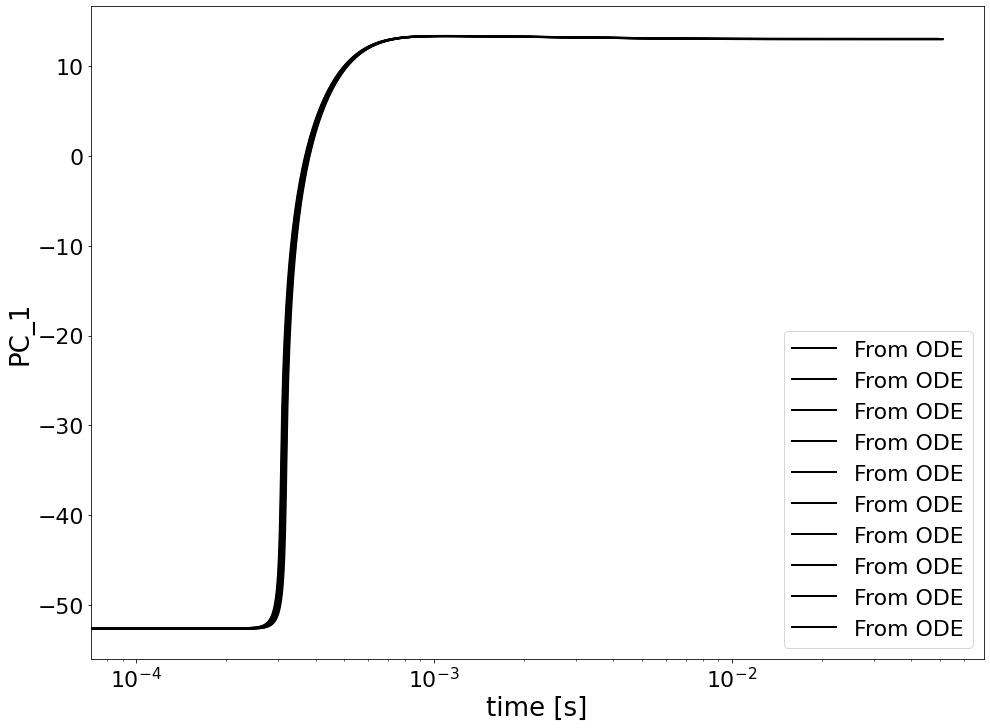

In [12]:
### Evaluating on Test Data

iPC    = 0

fig = plt.figure(figsize=(16,12))
for iTest in range(len(T0sVec)):

    FileName                     = DirDir+'/'+str(NVarsRed)+'PC/train/ext/PC.csv.'+str(iTest+1)
    InputDataTest                = pd.read_csv(FileName, header=0)
    tVec                         = InputDataTest['t'].to_numpy()
    #InputDataTest['log10(Rest)'] = RestVal * np.ones(len(tVec))
    yMat_pca                     = InputDataTest[InputVars].to_numpy()
    y0_pca                       = yMat_pca[0,:]
    print('y0_pca = ', y0_pca)
    
    plt.plot(tVec, yMat_pca[:,iPC], '-k', label='From ODE', lw=2)

plt.xscale('log')
plt.xlabel('time [s]')
plt.ylabel('PC_'+str(iPC+1))
plt.legend()

In [7]:
FileName = OutputDir+'/'+str(NVarsRed)+'PC/ROM/A.csv'
A        = pd.read_csv(FileName, delimiter=',', header=None).to_numpy()

FileName = OutputDir+'/'+str(NVarsRed)+'PC/ROM/C.csv'
C        = pd.read_csv(FileName, delimiter=',', header=None).to_numpy()

FileName = OutputDir+'/'+str(NVarsRed)+'PC/ROM/D.csv'
D        = pd.read_csv(FileName, delimiter=',', header=None).to_numpy()

In [8]:
yMat_    = (yMat_pca.dot(A))*D[:,0] + C[:,0]

iVar =  2


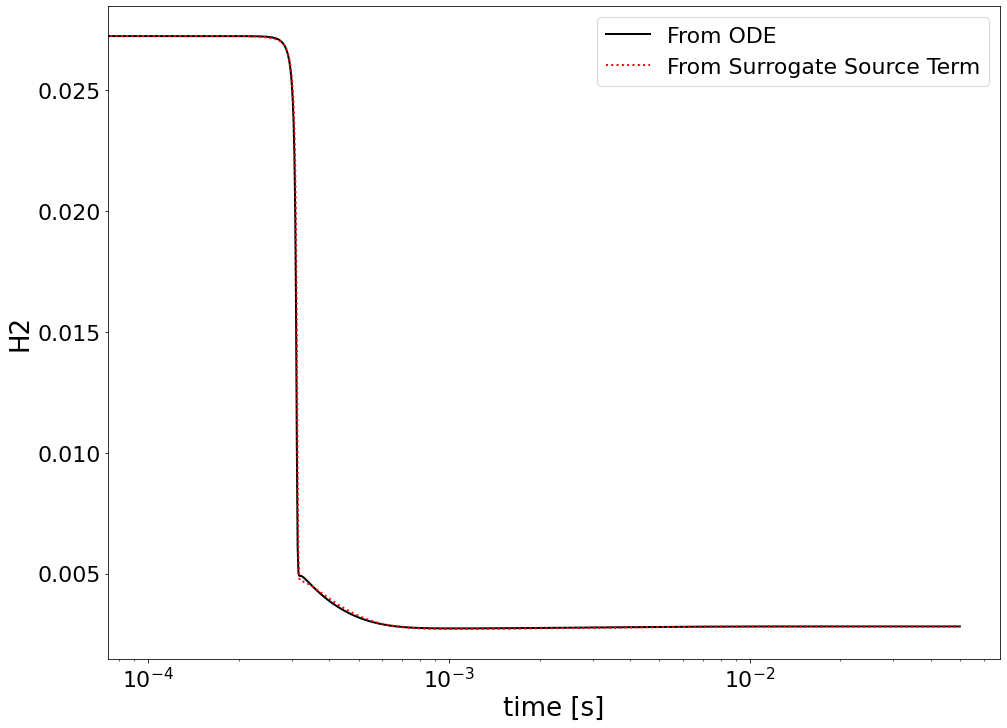

In [9]:
FileName = DirDir +'/Orig/train/ext/y.csv.1'
Data     = pd.read_csv(FileName, header=0)
VarNames = list(Data.columns)

VarOI    = 'H2'
for iVar in range(1,len(VarNames)):
    if (VarNames[iVar] == VarOI):
        print('iVar = ', iVar)
        break
        
fig = plt.figure(figsize=(16,12))
for iTest in CasesVec:

    FileName     = DirDir +'/Orig/train/ext/y.csv.'+str(iTest+1)
    Data         = pd.read_csv(FileName, header=0)
    tVec         = Data.to_numpy()[:,0]
    yMat         = Data.to_numpy()[:,1:]
        
    plt.plot(tVec, yMat[:,iVar-1],  '-k', label='From ODE',                   lw=2)
    plt.plot(tVec, yMat_[:,iVar-1], ':r', label='From Surrogate Source Term', lw=2)

plt.xscale('log')
plt.xlabel('time [s]')
plt.ylabel(VarOI)
plt.legend()